In [ ]:
# Compile darknet

!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

print("Building. . . It might take 2-3 minutes")

!make &> build_log.txt

Building. . . It might take 2-3 minutes


In [ ]:
# Download data
!mkdir kaggle_and_no-mask_dataset
!wget "https://www.dropbox.com/s/6gewe947ake1g95/kaggle_and_no-mask_dataset.zip?dl=1" -O kaggle_and_no-mask_dataset.zip
!unzip -q kaggle_and_no-mask_dataset.zip -d kaggle_and_no-mask_dataset &> /dev/null

--2020-06-15 12:16:51--  https://www.dropbox.com/s/6gewe947ake1g95/kaggle_and_no-mask_dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6030:1::a27d:5001
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/6gewe947ake1g95/kaggle_and_no-mask_dataset.zip [following]
--2020-06-15 12:16:51--  https://www.dropbox.com/s/dl/6gewe947ake1g95/kaggle_and_no-mask_dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfc4fd1d25344bfc57d5f57c31d.dl.dropboxusercontent.com/cd/0/get/A5vwKDdOaz6UA-77XGU6CE3Zs5oP53Ahr-Htei8dpy3GZS7jCrmlkajY_mLGeXKTZRDHintp2hUOh-Quzxo3QycsQFMN9wykM_A6zdJk3h7RogZa9fGrOnvrP6tgozukoYY/file?dl=1# [following]
--2020-06-15 12:16:51--  https://ucfc4fd1d25344bfc57d5f57c31d.dl.dropboxusercontent.com/cd/0/get/A5vwKDdOaz6UA-77XGU6CE3Zs5oP53Ahr-Htei8dpy3GZS7jCrmlkaj

In [ ]:
# Prepare dataset files

import random
import os
import subprocess
import sys

image_dir = "./kaggle_and_no-mask_dataset"
f_val = open("data_test.txt", 'w')
f_train = open("data_train.txt", 'w')

path, dirs, files = next(os.walk(image_dir))
data_size = len(files)

ind = 0
data_test_size = int(0.2 * data_size)
test_array = random.sample(range(data_size), k=data_test_size)

for f in os.listdir(image_dir):
    if(f.split(".")[-1] == "jpg" or f.split(".")[-1] == "jpeg" or f.split(".")[-1] == 'png' or f.split(".")[-1] == "JPG"):
        ind += 1

        if ind in test_array:
            f_val.write(image_dir+'/'+f+'\n')
        else:
            f_train.write(image_dir+'/'+f+'\n')

f_train.close()
f_val.close()

In [ ]:
# Upload the configuration files
# Upload the file "mask-cfg.zip" which is already uploaded in the repo
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

!unzip -q mask-cfg.zip

Saving mask-cfg.zip to mask-cfg.zip
User uploaded file "mask-cfg.zip" with length 2035 bytes


In [ ]:
# Download weights for Convolutional backbone

# Original File : https://pjreddie.com/media/files/darknet53.conv.74
!wget "https://www.dropbox.com/s/18dwbfth7prbf0h/darknet53.conv.74?dl=1" -O darknet53.conv.74

--2020-06-15 12:24:32--  https://www.dropbox.com/s/18dwbfth7prbf0h/darknet53.conv.74?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.1, 2620:100:6030:1::a27d:5001
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/18dwbfth7prbf0h/darknet53.conv.74 [following]
--2020-06-15 12:24:33--  https://www.dropbox.com/s/dl/18dwbfth7prbf0h/darknet53.conv.74
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbc38f4fd976e1855cccbb05cc3.dl.dropboxusercontent.com/cd/0/get/A5vUNK3ioLoInIawgFl17kCoyLODA4XLrPkvNjw8s5rd81tPr6o2f7ZPoKjqWpD47y0tr9cnSbD8YlKSkeW3aWnELiZJTUXckwHfdxlzGVkqJ8Svw4-ZfsHwtMYsQIhvEZI/file?dl=1# [following]
--2020-06-15 12:24:33--  https://ucbc38f4fd976e1855cccbb05cc3.dl.dropboxusercontent.com/cd/0/get/A5vUNK3ioLoInIawgFl17kCoyLODA4XLrPkvNjw8s5rd81tPr6o2f7ZPoKjqWpD47y0tr9cnSbD8YlKSkeW3aWnELiZJTU

In [ ]:
# Start training
!./darknet detector train mask-setup.data mask-train.cfg ./darknet53.conv.74 -dont_show -map 2> train_log.txt

The final metric: `mean_average_precision (mAP@0.5)` comes out to be **0.848447**.

# <font style="color:blue"> Perform Inference</font>
Finally, let us use the trained model to perform inference on some unseen images from the internet.

In [ ]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

i=1

def display_output(imagePath):
    global i
    src = cv2.imread(imagePath,1)
    output = cv2.imread("predictions.jpg")

    plt.figure(figsize=[20,8])
    plt.subplot(121)
    plt.imshow(src[:,:,::-1])
    plt.title("Original Image")
    plt.subplot(122)
    plt.imshow(output[:,:,::-1])
    plt.title("Predictions")
    plt.show()
    #print(type(output))
    cv2.imwrite("yolov3_test_"+str(i)+".jpg", output)
    i+=1

### <font style="color:green"> Test Image 1</font>

In [ ]:
!wget "https://www.dropbox.com/s/fxei8rit9v2n83s/test-image1.jpg?dl=1" -O test1.jpg

--2020-06-15 18:26:56--  https://www.dropbox.com/s/fxei8rit9v2n83s/test-image1.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.1, 2620:100:6030:1::a27d:5001
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/fxei8rit9v2n83s/test-image1.jpg [following]
--2020-06-15 18:26:57--  https://www.dropbox.com/s/dl/fxei8rit9v2n83s/test-image1.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd4ff182e4a1d8641822f5e533f.dl.dropboxusercontent.com/cd/0/get/A5v7hSGWDJ4zfEYpGQFzCEOtbZquiej8UVzbY4wk42fAye03c0YfO9xKJEpP-Ulv6j3P9qJUEyA2pGFZRiGyd9ZiL8qJkS20OIKuHe2qDw97whhZl7TPlqBeyK_Xz9TKElI/file?dl=1# [following]
--2020-06-15 18:26:57--  https://ucd4ff182e4a1d8641822f5e533f.dl.dropboxusercontent.com/cd/0/get/A5v7hSGWDJ4zfEYpGQFzCEOtbZquiej8UVzbY4wk42fAye03c0YfO9xKJEpP-Ulv6j3P9qJUEyA2pGFZRiGyd9ZiL8qJkS20OIKu

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 

 seen 64, trained: 236 K-images (3 Kilo-batches_64) 
test1.jpg: Predicted in 20.060000 milli-seconds.
Mask: 100%


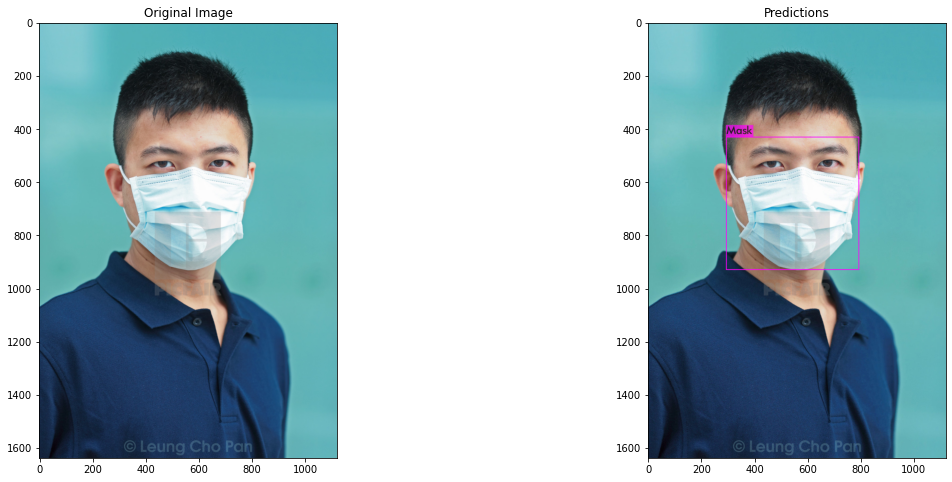

In [ ]:
!./darknet detector test mask-setup.data mask-test.cfg backup/mask-train_best.weights test1.jpg -thresh .6 2> /dev/null
display_output("test1.jpg")

### <font style="color:green">Test Image 2</font>

In [ ]:
!wget "https://www.dropbox.com/s/ia1fijzr69ytpp1/test-image2.jpg?dl=1" -O test2.jpg

--2020-06-15 18:32:02--  https://www.dropbox.com/s/ia1fijzr69ytpp1/test-image2.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.1, 2620:100:6030:1::a27d:5001
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/ia1fijzr69ytpp1/test-image2.jpg [following]
--2020-06-15 18:32:03--  https://www.dropbox.com/s/dl/ia1fijzr69ytpp1/test-image2.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2f4cc97ec5a7f32aa45847bd83.dl.dropboxusercontent.com/cd/0/get/A5u7wzHwN5Ut7ihyuJ_9PTPY4GBRAZQolGGvMoZJtJjKmKlQ3JEjdBzWBl7anhg7lRgelerOFjVpq17ctVG1NZHqUOYPpsMfCSwbr3K1kwSv-ELeiqywutOjj0Ecnz-eFJs/file?dl=1# [following]
--2020-06-15 18:32:03--  https://uc2f4cc97ec5a7f32aa45847bd83.dl.dropboxusercontent.com/cd/0/get/A5u7wzHwN5Ut7ihyuJ_9PTPY4GBRAZQolGGvMoZJtJjKmKlQ3JEjdBzWBl7anhg7lRgelerOFjVpq17ctVG1NZHqUOYPpsMfCSwb

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 

 seen 64, trained: 236 K-images (3 Kilo-batches_64) 
test2.jpg: Predicted in 20.022000 milli-seconds.
Mask: 100%
Mask: 100%
Mask: 87%
No-mask: 100%
Mask: 86%


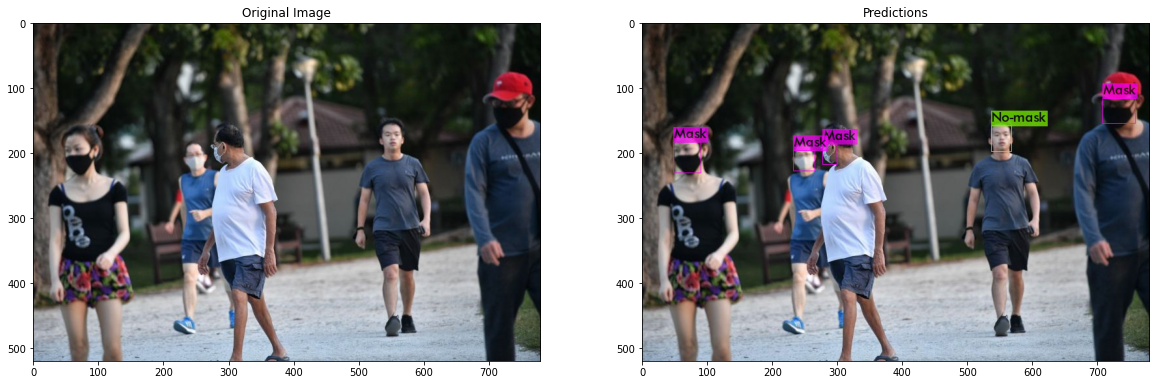

In [ ]:
!./darknet detector test mask-setup.data mask-test.cfg backup/mask-train_best.weights test2.jpg -thresh .6  2> /dev/null
display_output("test2.jpg")

### <font style="color:green">Test Image 3</font>

In [ ]:
!wget "https://www.dropbox.com/s/g905k4r1git5kbx/test-image3.jpg?dl=1" -O test3.jpg

--2020-06-15 18:32:54--  https://www.dropbox.com/s/g905k4r1git5kbx/test-image3.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.1, 2620:100:6030:1::a27d:5001
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/g905k4r1git5kbx/test-image3.jpg [following]
--2020-06-15 18:32:54--  https://www.dropbox.com/s/dl/g905k4r1git5kbx/test-image3.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc1cd13bd86c0d37e5ea584a1615.dl.dropboxusercontent.com/cd/0/get/A5v8KgWio6enpnIDYwOuHcfgSzTExniZ0ucOaJVZBx39QjsAEzKvfng3kSzqf-7_5_cLlJ6t-X3oqfLFpHWW2u16ZfX2qQExStId1lYMcbu5t8ImelNOFGognPKwLV8JQkI/file?dl=1# [following]
--2020-06-15 18:32:55--  https://uc1cd13bd86c0d37e5ea584a1615.dl.dropboxusercontent.com/cd/0/get/A5v8KgWio6enpnIDYwOuHcfgSzTExniZ0ucOaJVZBx39QjsAEzKvfng3kSzqf-7_5_cLlJ6t-X3oqfLFpHWW2u16ZfX2qQExStId

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 

 seen 64, trained: 236 K-images (3 Kilo-batches_64) 
test3.jpg: Predicted in 19.944000 milli-seconds.
Mask: 100%
Mask: 97%
Mask: 100%
No-mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 98%
Mask: 100%
Mask: 100%
Mask: 99%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 100%
Mask: 97%
Mask: 100%
Mask: 100%


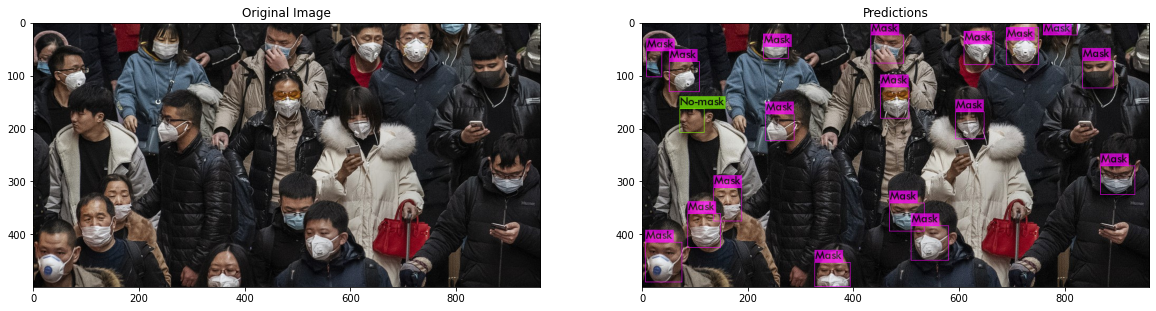

In [ ]:
!./darknet detector test mask-setup.data mask-test.cfg backup/mask-train_best.weights test3.jpg -thresh .6  2> /dev/null
display_output("test3.jpg")

### <font style="color:green"> Test Image 4</font>

In [ ]:
!wget "https://www.dropbox.com/s/90ggmiur7b8g35m/test-image4.jpg?dl=1" -O test4.jpg

--2020-06-15 18:33:38--  https://www.dropbox.com/s/90ggmiur7b8g35m/test-image4.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.1, 2620:100:6030:1::a27d:5001
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/90ggmiur7b8g35m/test-image4.jpg [following]
--2020-06-15 18:33:39--  https://www.dropbox.com/s/dl/90ggmiur7b8g35m/test-image4.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucabf814a968d403faf9910f8469.dl.dropboxusercontent.com/cd/0/get/A5sBmIu63AawsXfOVvJvcYxuo7-GzLA1BefKuigCp5dwukoiNHvpll-uF0vk_qL4Tu3PAsmkb6aRSlDzVvRNzNKgVn1F2SjTZake7wbBxZOsZR6RLPtVf306MoybvRBjsy0/file?dl=1# [following]
--2020-06-15 18:33:39--  https://ucabf814a968d403faf9910f8469.dl.dropboxusercontent.com/cd/0/get/A5sBmIu63AawsXfOVvJvcYxuo7-GzLA1BefKuigCp5dwukoiNHvpll-uF0vk_qL4Tu3PAsmkb6aRSlDzVvRNzNKgVn1F2SjTZake

net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 

 seen 64, trained: 236 K-images (3 Kilo-batches_64) 
test4.jpg: Predicted in 19.784000 milli-seconds.
No-mask: 99%
No-mask: 85%
Mask: 100%
Mask: 100%
No-mask: 98%
Mask: 100%
No-mask: 87%
Mask: 100%


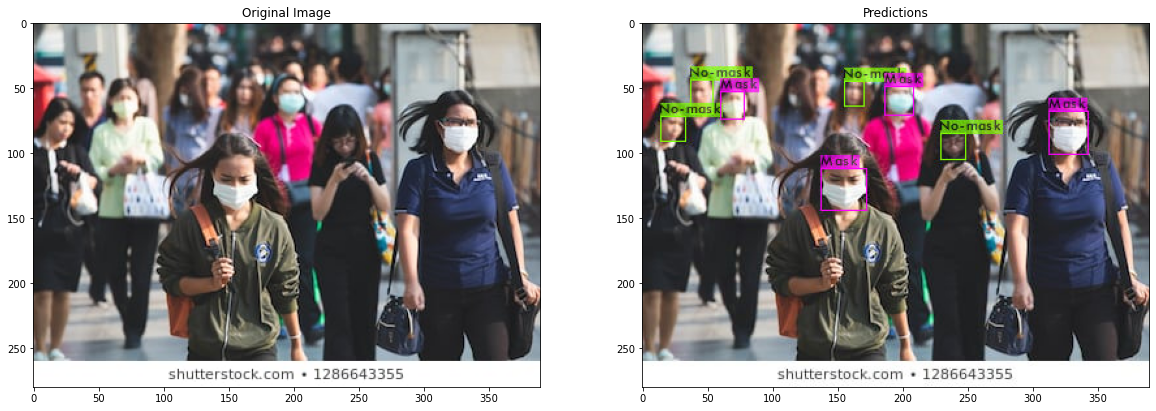

In [ ]:
!./darknet detector test mask-setup.data mask-test.cfg backup/mask-train_best.weights test4.jpg -thresh .6 2> /dev/null
display_output("test4.jpg")

In [ ]:
!wget "https://www.dropbox.com/s/pds0w3z5y7w89oz/test-video1.mp4?dl=1" -O test-video1.mp4

--2020-06-15 18:48:25--  https://www.dropbox.com/s/pds0w3z5y7w89oz/test-video1.mp4?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6030:1::a27d:5001
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/pds0w3z5y7w89oz/test-video1.mp4 [following]
--2020-06-15 18:48:25--  https://www.dropbox.com/s/dl/pds0w3z5y7w89oz/test-video1.mp4
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfe3fa6305d533481bb768e7a95.dl.dropboxusercontent.com/cd/0/get/A5vqDd_IvVSsZxcH9-MmJzvNDxlUTEt3ONg9nUxHIEWHF8Pv5jAej_VrQYytlgwhSbmO2AuMcUZVLMhV2MNXUnKYghzdFT9V3whTAc9v8IU36JsqW0__xHLo4fv6A2gNBVI/file?dl=1# [following]
--2020-06-15 18:48:26--  https://ucfe3fa6305d533481bb768e7a95.dl.dropboxusercontent.com/cd/0/get/A5vqDd_IvVSsZxcH9-MmJzvNDxlUTEt3ONg9nUxHIEWHF8Pv5jAej_VrQYytlgwhSbmO2AuMcUZVLMhV2MNXUnKYghzdFT9V3whT

In [ ]:
!./darknet detector demo mask-setup.data mask-test.cfg backup/mask-train_best.weights test-video1.mp4 -thresh .6 -out_filename out-vid1.avi -dont_show

In [ ]:
!wget "https://www.dropbox.com/s/sqwu0ktdtlxtdsd/test-video2.mp4?dl=1" -O test-video2.mp4

--2020-06-15 18:59:42--  https://www.dropbox.com/s/sqwu0ktdtlxtdsd/test-video2.mp4?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.82.1, 2620:100:6030:1::a27d:5001
Connecting to www.dropbox.com (www.dropbox.com)|162.125.82.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/sqwu0ktdtlxtdsd/test-video2.mp4 [following]
--2020-06-15 18:59:42--  https://www.dropbox.com/s/dl/sqwu0ktdtlxtdsd/test-video2.mp4
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc22a706f0f2cc8ccf27888e7878.dl.dropboxusercontent.com/cd/0/get/A5vc6JqoytD35tHKZcaQsXG0dNveeXhzmNsRRLdrMYjFkgKqmQDaGtU7PWnU34dA5HIn8Tp8XC9hDjPzUfpb2Oz9ONHdtTeOQvhZo1h3_idEGTQzZqZ__FG3hdQeeaca720/file?dl=1# [following]
--2020-06-15 18:59:43--  https://uc22a706f0f2cc8ccf27888e7878.dl.dropboxusercontent.com/cd/0/get/A5vc6JqoytD35tHKZcaQsXG0dNveeXhzmNsRRLdrMYjFkgKqmQDaGtU7PWnU34dA5HIn8Tp8XC9hDjPzUfpb2Oz9ONHdtTeOQvhZ

In [ ]:
!./darknet detector demo mask-setup.data mask-test.cfg backup/mask-train_best.weights test-video2.mp4 -thresh .6 -out_filename out-vid2.avi -dont_show